In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab11.ok')

Assignment: lab11
OK, version v1.13.11



# Lab 11 Decision Tree, Random Forest and PCA#

This lab will have two disjoint parts. 

In the first part, we will have you train a multi-class classifier with three different models (one-vs-rest logistic regression, decision tree, random forest) and compare the accuracies and decision boundaries created by each.

In the second part, we will have you perform Principal Component Analysis on Iris data.

**Note: This lab is a bit longer than the previous labs. You should start early!**

### Due Date

This assignment is due at Monday, May 4th at 11:59 pm PST.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble

# Part I – Classification

Let's start with classification! We'll now be looking at a dataset of per-game stats for all NBA players in the 2018-19 season. This dataset comes from basketball-reference.com.

In [3]:
nba_data = pd.read_csv("nba18-19.csv")
nba_data.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


Our goal will be to predict a player's position given several other features. The 5 positions in basketball are PG, SG, SF, PF, and C (which stand for point guard, shooting guard, small forward, power forward, and center). This information is contained in the `Pos` column.

In [4]:
nba_data['Pos'].value_counts()

SG       176
PF       147
PG       139
C        120
SF       118
PF-SF      2
SF-SG      2
PF-C       1
SG-PF      1
SG-SF      1
C-PF       1
Name: Pos, dtype: int64

While we could set out to try and perform 5-class classification, the results (and visualizations) are slightly more interesting if we try and categorize players into 1 of 3 categories: **guard**, **forward**, and **center**. The below code will take the `Pos` column of our dataframe and use it to create `Pos3`.

In [5]:
def basic_position(pos):
    if 'F' in pos:
        return 'F'
    elif 'G' in pos:
        return 'G'
    return 'C'

nba_data['Pos3'] = nba_data['Pos'].apply(basic_position)
nba_data['Pos3'].value_counts()

G    315
F    273
C    120
Name: Pos3, dtype: int64

Furthermore, since there are **many** players in the NBA (in the 2018-19 season there were 530 unique players), our visualizations can tend to get noisy and messy. Let's restrict our data to only contain rows for players that averaged 10 or more points per game.

In [6]:
nba_data = nba_data[nba_data['PTS'] > 10]

Now, let's look at a scatterplot of Rebounds (`TRB`) vs. Assists (`AST`).

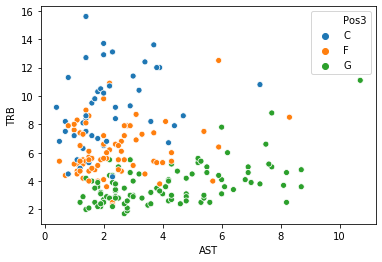

In [7]:
sns.scatterplot(data = nba_data, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.show()

As you can see, when using just rebounds and assists as our features, we see pretty decent cluster separation. That is, Centers, Forwards, and Guards appear in different regions of the plot.

## One-vs-Rest Logistic Regression

We only discussed binary logistic regression in class, but there is a natural extension to binary logistic regression called one-vs-rest logistic regression for multiclass classification. In essence, one-vs-rest logistic regression simply builds one binary logistic regression classifier for each of the $N$ classes (in this scenario $N = 3$). We then predict the class corresponding to the classifier that gives the highest probability among the $N$ classes.

Before using logistic regression, let's first split `nba_data` into a training set and test set.

In [8]:
nba_train, nba_test = train_test_split(nba_data, test_size=0.25, random_state=100)
nba_train = nba_train.sort_values(by='Pos')
nba_test = nba_test.sort_values(by='Pos')

### Question 1a

In the cell below, set `logistic_regression_model` to be a one-vs-rest logistic regression model. Then, fit that model using the `AST` and `TRB` columns (in that order) from `nba_train` as our features, and `Pos3` as our response variable.

Remember, [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) has already been imported for you. There is an optional parameter **`multi_class`** you need to specify in order to make your model a multi-class one-vs-rest classifier. See the documentation for more details.



<!--
BEGIN QUESTION
name: q1a
-->

In [14]:
logistic_regression_model = LogisticRegression(multi_class = "ovr")
logistic_regression_model.fit(nba_train[["AST", "TRB"]], nba_train["Pos3"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



To see our classifier in action, we can use `logistic_regression_model.predict` and see what it outputs.

In [16]:
nba_train['Predicted (OVRLR) Pos3'] = logistic_regression_model.predict(nba_train[['AST', 'TRB']])
nba_train[['AST', 'TRB', 'Pos3', 'Predicted (OVRLR) Pos3']].head(15)

,AST,TRB,Pos3,Predicted (OVRLR) Pos3
655,1.4,8.6,C,C
644,2.0,10.2,C,C
703,0.8,4.5,C,F
652,1.6,7.2,C,F
165,1.4,7.5,C,C
122,2.4,8.4,C,C
353,7.3,10.8,C,C
367,1.4,8.6,C,C
408,1.2,4.9,C,F
161,3.9,12.0,C,C


Our model does decently well here, as you can see visually above. Below, we compute the training accuracy:

In [17]:
lr_training_accuracy = logistic_regression_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
lr_training_accuracy

0.7964071856287425

We can compute the test accuracy as well by looking at `nba_test` instead of `nba_train`:

In [18]:
lr_test_accuracy = logistic_regression_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
lr_test_accuracy

0.6428571428571429

Now, let's draw the decision boundary for this logistic regression classifier, and see how the classifier performs on both the training and test data.

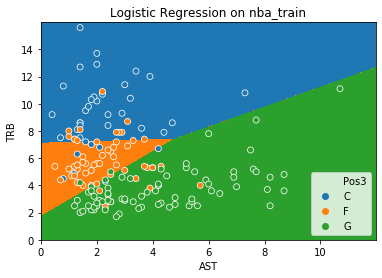

In [19]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_train, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Logistic Regression on nba_train')
plt.show()

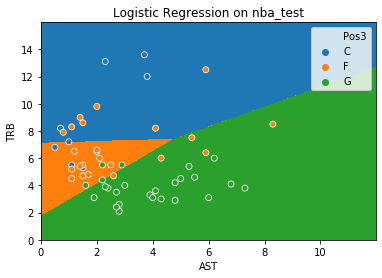

In [20]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_test, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Logistic Regression on nba_test')
plt.show()

Our one-vs-rest logistic regression was able to find a linear decision boundary between the three classes. It generally classifies centers as players with a lot of rebounds, forwards as players with a medium number of rebounds and a low number of assists, and guards as players with a low number of rebounds. 

Note: In practice we would use many more features – we only used 2 here just so that we could visualize the decision boundary.

## Decision Trees

### Question 1b

Let's now create a decision tree classifier on the same training data `nba_train`, and look at the resulting decision boundary. 

In the following cell, first, use [`tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model using the same features and response as above, and call this model `decision_tree_model`. Set the `random_state` parameter to 42.

**Hint:** Your code will be mostly be the same as question 1a.

<!--
BEGIN QUESTION
name: q1b
-->

In [27]:
decision_tree_model = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(nba_train[["AST", "TRB"]], nba_train["Pos3"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [28]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, let's draw the decision boundary for this decision tree classifier, and see how the classifier performs on both the training and test data.

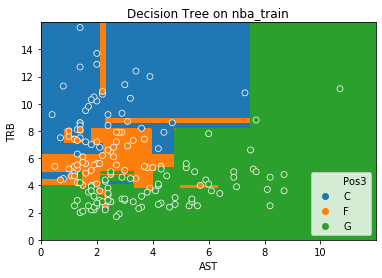

In [29]:
xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_train, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Decision Tree on nba_train');

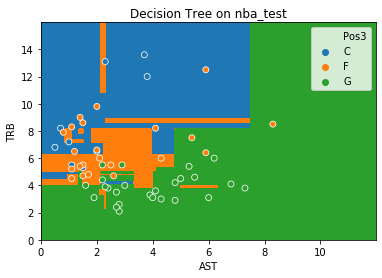

In [30]:
xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_test, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Decision Tree on nba_test');

### Question 1c

Set `dt_training_accuracy` to be the training accuracy of the decision tree model and `dt_test_accuracy` to be the test accuracy.

**Hint:** If you're failing this test, make sure you have the correct `random_state` parameter to `tree.DecisionTreeClassifier` in question 2b.

<!--
BEGIN QUESTION
name: q1c
-->

In [31]:
dt_training_accuracy = decision_tree_model.score(nba_train[["AST", "TRB"]], nba_train["Pos3"])
dt_test_accuracy = decision_tree_model.score(nba_test[["AST", "TRB"]], nba_test["Pos3"])
dt_training_accuracy, dt_test_accuracy

(0.9940119760479041, 0.6428571428571429)

In [32]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Random Forests

### Question 1d

Let's now create a random forest classifier on the same training data `nba_train` and look at the resulting decision boundary. 

In the following cell, use [`ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to fit a model using the same features and response as above, and call this model `random_forest_model`. Use 20 trees in your random forest classifier, and set the `random_state` parameter to 42.

**Hint:** Your code for both parts will be mostly the same as questions 1a and 1b.

**Hint:** Look at the `n_estimators` parameter of `ensemble.RandomForestClassifier`.

<!--
BEGIN QUESTION
name: q1d
-->

In [37]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
random_forest_model.fit(nba_train[["AST", "TRB"]], nba_train["Pos3"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, let's draw the decision boundary for this random forest classifier, and see how the classifier performs on both the training and test data.

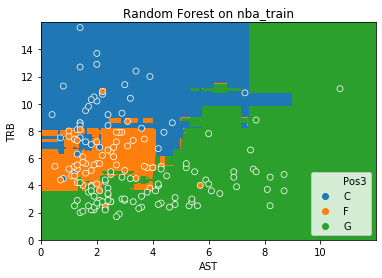

In [39]:
xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_train, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Random Forest on nba_train');

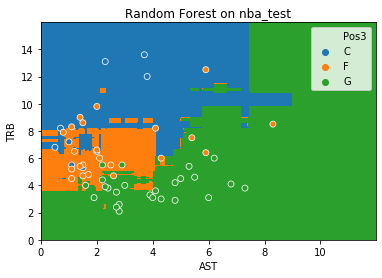

In [40]:
xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = nba_test, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.title('Random Forest on nba_test');

### Question 1e

Set `rf_train_accuracy` to be the training accuracy of the random forest model and `rf_test_accuracy` to be the test accuracy.

**Hint:** If you're failing this test, make sure you have the correct parameters to `ensemble.RandomForestClassifier` in question 1d.

<!--
BEGIN QUESTION
name: q1e
-->

In [41]:
rf_train_accuracy = random_forest_model.score(nba_train[["AST", "TRB"]], nba_train["Pos3"])
rf_test_accuracy = random_forest_model.score(nba_test[["AST", "TRB"]], nba_test["Pos3"])
rf_train_accuracy, rf_test_accuracy

(0.9760479041916168, 0.7142857142857143)

In [42]:
ok.grade("q1e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1f

Looking at the three models you created (multiclass one-vs-rest logistic regression, decision tree, random forest), which model performed the best on the training set, and which model performed the best on the test set? How are the training and test accuracy related for the three models, and how do the decision boundaries generated for each of the three models relate to the model's performance?

<!--
BEGIN QUESTION
name: q1f
-->

The decision tree model performed the best on the training set and the random forest model performed the best on the test set. The multiclass one-vs-rest logistic regression model's accuracy is low on the training data but higher on the test data (than the decision tree's). Overall, the training accuracies are generally a lot higher than testing accuracies for all the models, indicating overfitting.

# Part II PCA

In this part of the lab, we will perform Dimensionality Reduction using PCA.

To begin, run the following cell to load the dataset into this notebook. 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape 150 x 4). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

Additional information on the dataset will be included in the description printed at the end of the following cell.

In [43]:
from sklearn.datasets import load_iris
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

The following code produces scatter plots of our iris features.

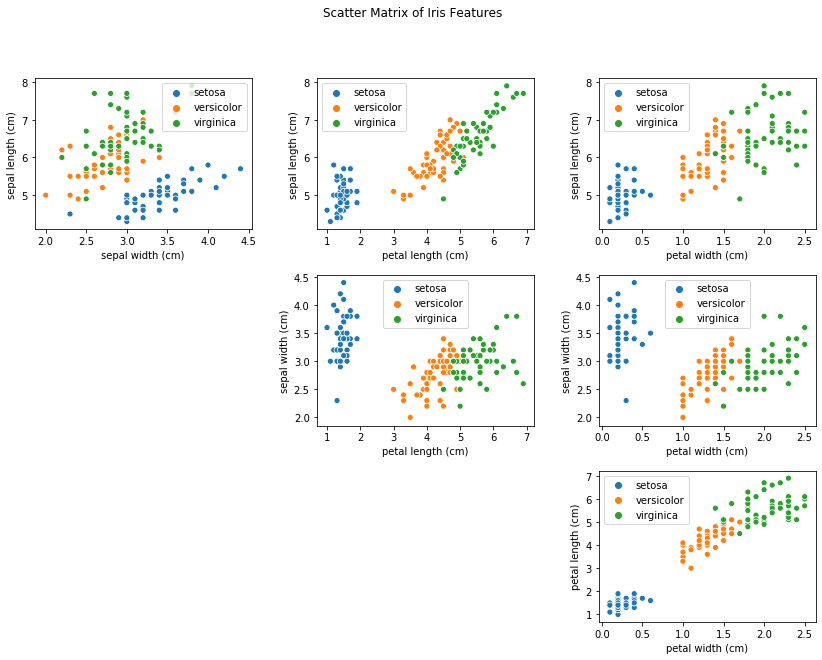

In [44]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(1, 4):
    for j in range(i):
        plt.subplot(3, 3, i+3*j)
        sns.scatterplot(iris_features[:, i], iris_features[:, j], hue=iris_target)
        plt.xlabel(iris_feature_names[i])
        plt.ylabel(iris_feature_names[j])
plt.show()

## Question 2a

To apply PCA, we will first need to "center" the data so that the mean of each feature is 0. 

Compute the columnwise mean of `iris_features` in the cell below and store it in `iris_mean` (should be a numpy array of 4 means, 1 for each attribute). Then, subtract `iris_mean` from `iris_features`, and save the result in `features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `iris_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q2a
-->

In [45]:
iris_mean = np.mean(iris_features, axis = 0)
features = iris_features - iris_mean
iris_mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [46]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function compute the SVD of our `features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt` respectively.

**Hint:** Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q2b
-->

In [47]:
u, s, vt = np.linalg.svd(features, full_matrices = False)
u.shape, s, vt.shape

((150, 4), array([25.09996044,  6.01314738,  3.41368064,  1.88452351]), (4, 4))

In [48]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



What can we learn from the singular values in `s`? First, we can compute the total variance of the data by summing the squared singular values. We will later be able to use this value to determine the variance captured by a subset of our principal components.

The cell below computes the total variance below by summing the square of `s`.


In [49]:
total_variance = np.sum(np.square(s)) / iris_features.shape[0]
print("total_variance: {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(iris_features, axis=0))))

total_variance: 4.542 should approximately equal the sum of feature variances: 4.542


As you can see, `total_variance` is equal to the sum of feature variances.

## Question 2c

Let's now use only the first two principal components to see what a 2D version of our iris data looks like.

First, construct the 2D version of the iris data by matrix-multiplying our `features` by the first two right singular vectors in `v`. This will project the iris data down from a 4D subspace to a 2D subspace, and the first two right singular vectors are directions for the first two principal components.

**Hints:**
* To matrix multiply two numpy arrays, use @ or np.dot.
* The first two right singular vectors in `v` will be the first two columns of `v`, or the first two rows of `vt` (transposed to be column vectors instead of row vectors). 
* Since we want to obtain a 2D version of our iris dataset, the shape of `iris_2d` should be (150, 2).

<!--
BEGIN QUESTION
name: q2c
-->

In [75]:
iris_2d = features @ vt.T[:, :2]
np.sum(iris_2d[0])

-3.003522872554638

In [76]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

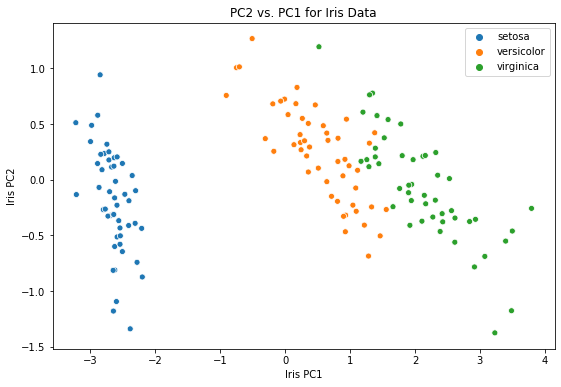

In [77]:
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(iris_2d[:, 0], iris_2d[:, 1], hue=iris_target)
plt.show()

## Question 2d

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three iris types?

<!--
BEGIN QUESTION
name: q2d
-->

Setosa is very clearly characterised by low PC1 and doesn't depend heavily on PC2 so we would be able to classify it really well. Versicolor and Virginica both occur at higher values of PC1, with Virginica being on even higher levels of PC1.They both also do not depend of PC2 a lot. It may be more difficult to classify points as either of these 2 categories due to the slight overlap, but we can consider a point with PC1 value over 1.5 to be virginica.

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? The cell below computes this quantity by dividing the sum of the first two squared singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. 

In [78]:
two_dim_variance = (np.sum(np.square(s[:2])) / iris_features.shape[0]) / total_variance
two_dim_variance

0.9776852063187949

Most of the variances of the data are explained by its projection on two dimensions!

## Question 2e

As a last step, let's create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each of each principal component. In the cell below, create a scree plot by plotting a line plot of the square of the singular values in `s` vs. the principal component number (1st, 2nd, 3rd, or 4th).

<img src="scree.png" width="400px" />

<!--
BEGIN QUESTION
name: q2e
-->

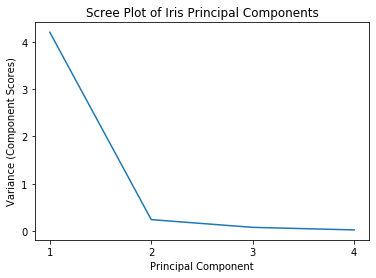

In [79]:
plt.plot([1, 2, 3, 4], s**2 / len(features));
plt.xticks([1, 2, 3, 4], [1, 2, 3, 4]);
plt.xlabel("Principal Component")
plt.title("Scree Plot of Iris Principal Components")
plt.ylabel("Variance (Component Scores)")
plt.show()

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>